

## Exploratory Data Analysis and Model Building for Telco Customer Churn

## Data Exploration:

Loaded Telco customer churn dataset and converted the 'Churn' column to binary values (1 for 'Yes', 0 for 'No').
Explored the churn rate by contract type and tenure.
Visualized churn distribution using bar and pie charts.
Analyzed the impact of numerical features ('tenure', 'MonthlyCharges') on churn using box plots.
Examined the distribution of categorical features ('Contract', 'InternetService', 'gender') by churn using count plots.
Displayed data types, distinct values, and ranges for numerical attributes.
Data Visualization:

Utilized box plots to show the impact of 'Churn' on 'tenure'.
Created scatter plots to visualize relationships between 'tenure' and 'TotalCharges', and 'tenure' and 'MonthlyCharges'.
Generated a histogram with a mean line for 'MonthlyCharges'.
Examined QQ plots for normal and uniform distributions of 'MonthlyCharges'.

## Model Building:

Employed logistic regression to predict customer churn based on selected features.
Trained the model, made predictions, and evaluated its performance using a confusion matrix and classification report.
Plotted the confusion matrix using ConfusionMatrixDisplay.
Fitted a Random Forest Classifier for model selection, performed cross-validation, and evaluated its performance.
Plotted the confusion matrix for the Random Forest Classifier.
Extracted and displayed feature importance from the Random Forest model.

# Exploratory Data Analysis

In [ ]:
import pandas as pd

file_path = 'C:\\Users\\Sriram\\OneDrive\\Desktop\\eMasters\\Q3\\MBA 933 Data Mining Tools Techniques\\Telco-Customer-Churn.csv'
telco_data = pd.read_csv(file_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
# Churn rate by contract type
# Convert 'Churn' column to binary (1 for 'Yes', 0 for 'No')
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})
churn_by_contract = telco_data.groupby('Contract')['Churn'].mean()
print(churn_by_contract)

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [ ]:
churn_by_tenure = telco_data.groupby('tenure')['Churn'].mean()
print(churn_by_tenure)

tenure
0     0.000000
1     0.619902
2     0.516807
3     0.470000
4     0.471591
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 73, dtype: float64


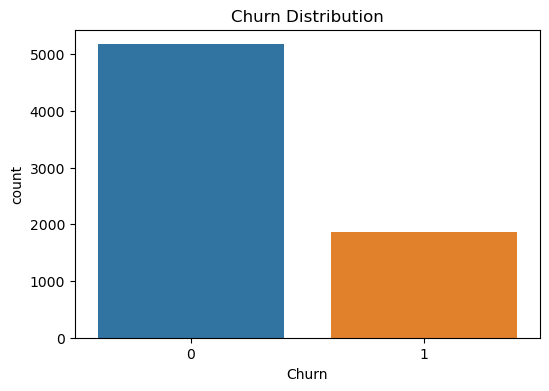

In [ ]:
%matplotlib inline
# Bar chart for Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telco_data)
plt.title('Churn Distribution')
plt.show()

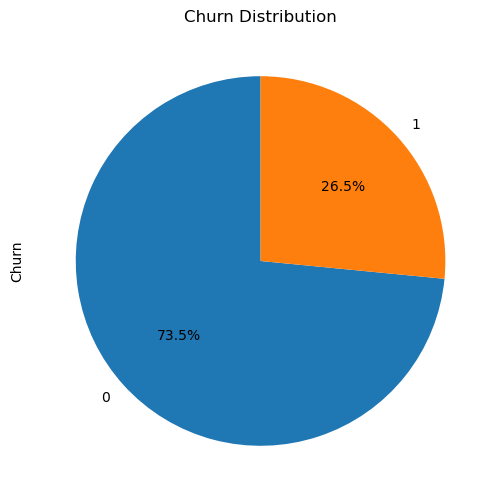

In [ ]:
# Pie chart for Churn distribution
plt.figure(figsize=(6, 6))
telco_data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

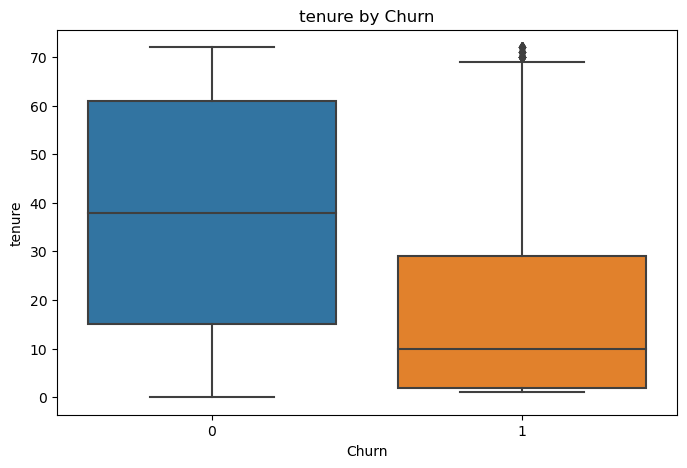

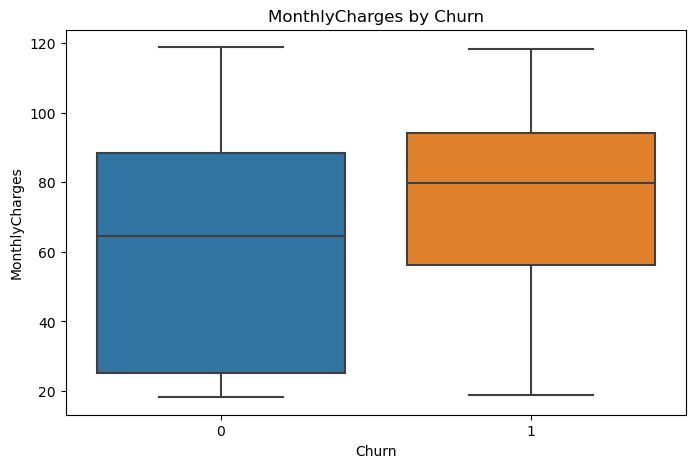

In [ ]:
# Box plot for numerical features
numeric_features = ['tenure', 'MonthlyCharges']

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=feature, data=telco_data)
    plt.title(f'{feature} by Churn')
    plt.show()

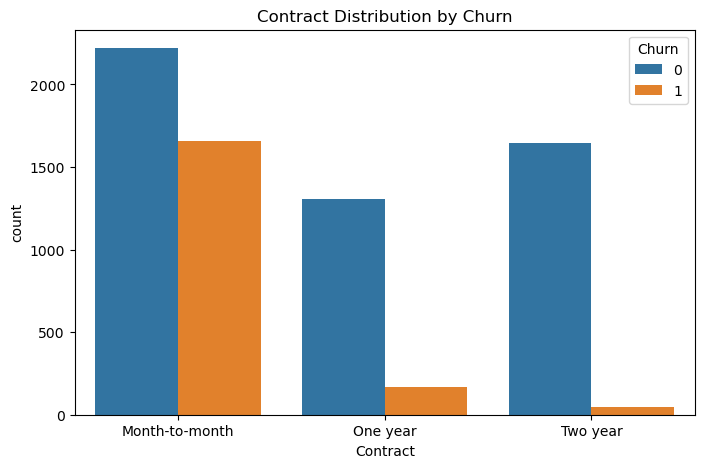

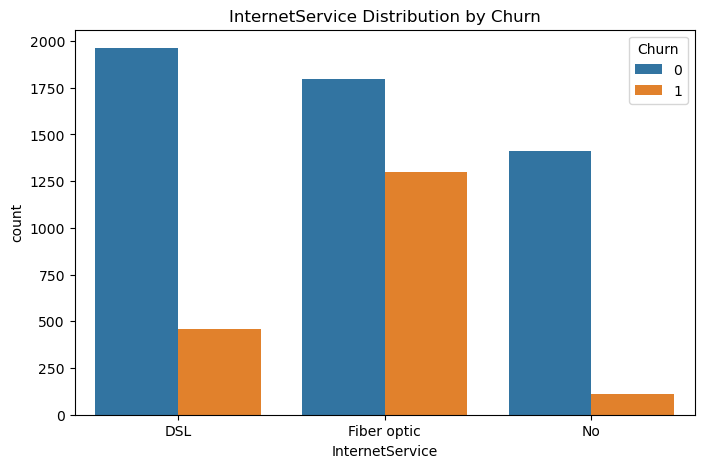

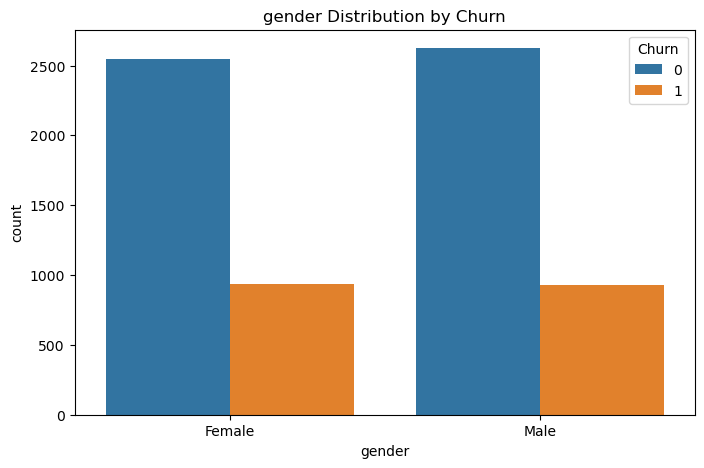

In [ ]:
# Bar chart for categorical features
categorical_features = ['Contract', 'InternetService','gender']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Churn', data=telco_data)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

In [ ]:
# Displaying the attributes and types
print(telco_data.dtypes)

# Displaying distinct values for each attribute
for column in telco_data.columns:
    distinct_values = telco_data[column].nunique()
    print(f"Attribute: {column}, Distinct Values: {distinct_values}")

# Displaying the range for numerical attributes
numerical_attributes = telco_data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_attributes:
    min_value = telco_data[column].min()
    max_value = telco_data[column].max()
    print(f"Attribute: {column}, Range: {min_value} - {max_value}")

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object
Attribute: customerID, Distinct Values: 7043
Attribute: gender, Distinct Values: 2
Attribute: SeniorCitizen, Distinct Values: 2
Attribute: Partner, Distinct Values: 2
Attribute: Dependents, Distinct Values: 2
Attribute: tenure, Distinct Values: 73
Attribute: PhoneService, Distinct Values: 2
Attribute: MultipleLines, Distinct Values: 3
Attribute: InternetService, Distinct Values: 3
Attribute: Onl

In [ ]:
# Displaying distinct values and their counts for each attribute
columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
for column in columns_of_interest:
    distinct_values_counts = telco_data[column].value_counts()
    print(f"Attribute: {column}")
    print(distinct_values_counts)
    print("\n")

Attribute: gender
Male      3555
Female    3488
Name: gender, dtype: int64


Attribute: SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Attribute: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Attribute: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


Attribute: Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Attribute: PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




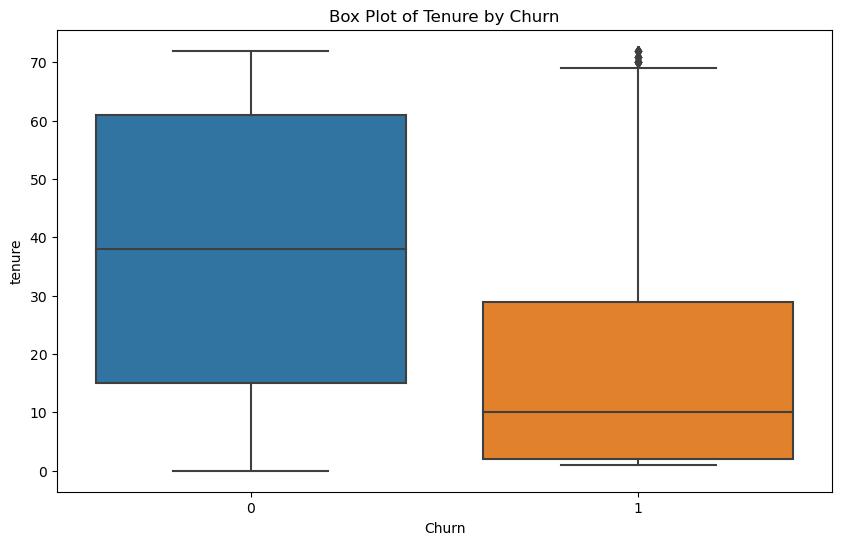

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=telco_data)
plt.title('Box Plot of Tenure by Churn')
plt.show()

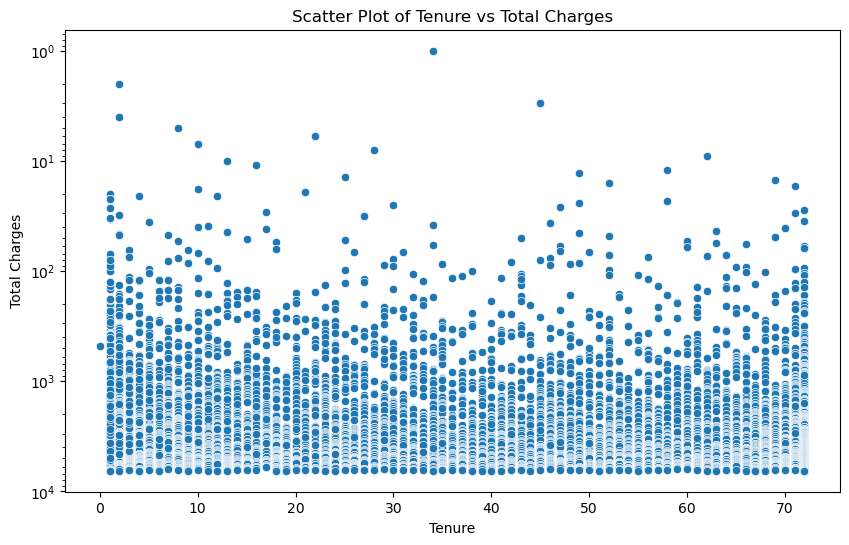

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='tenure', y='TotalCharges', data=telco_data)
scatter.set_title('Scatter Plot of Tenure vs Total Charges')
scatter.set_xlabel('Tenure')
scatter.set_ylabel('Total Charges')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

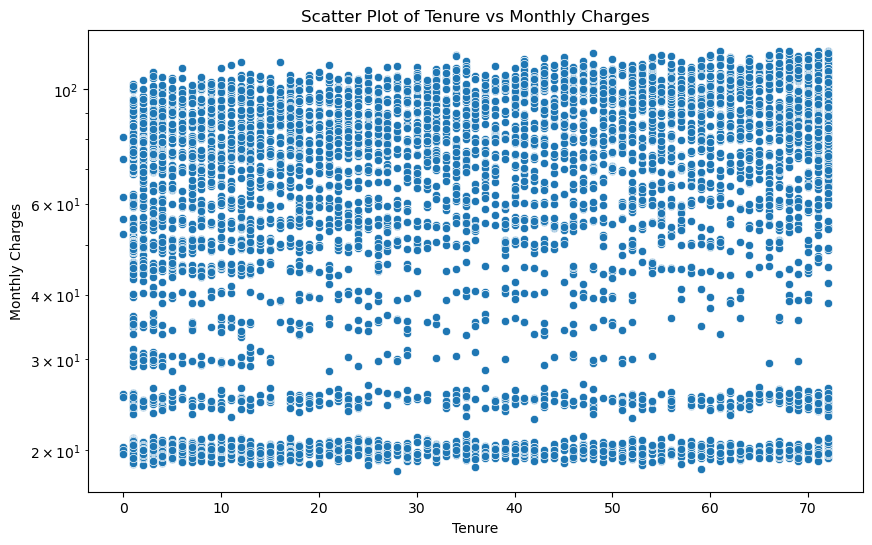

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='tenure', y='MonthlyCharges', data=telco_data)
scatter.set_title('Scatter Plot of Tenure vs Monthly Charges')
scatter.set_xlabel('Tenure')
scatter.set_ylabel('Monthly Charges')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

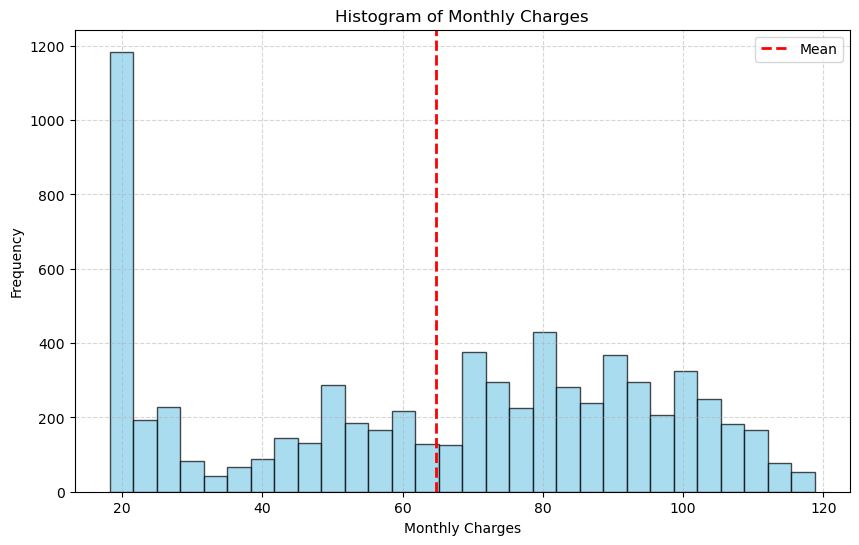

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(telco_data['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)  # Add alpha for transparency
plt.axvline(telco_data['MonthlyCharges'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')  # Add mean line
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()  # Show legend for the mean line
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.show()

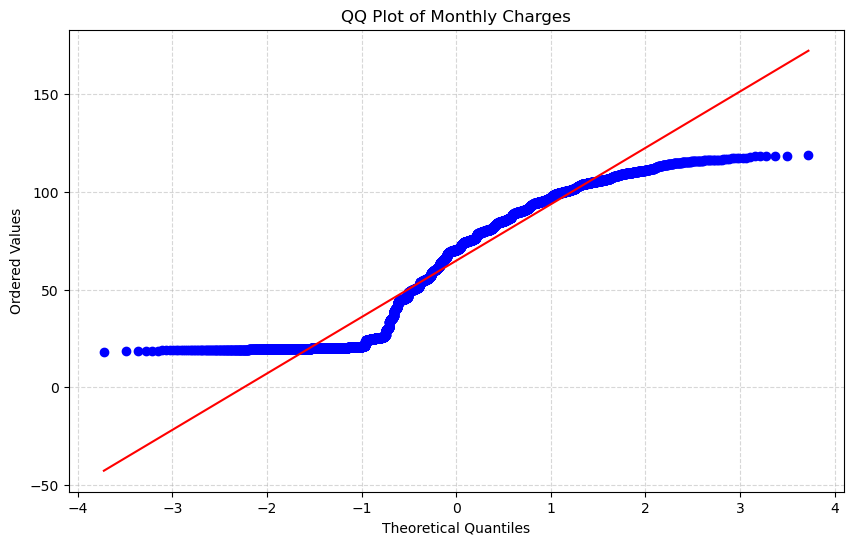

In [ ]:
# QQ plot Normal Distribution
plt.figure(figsize=(10, 6))
stats.probplot(telco_data['MonthlyCharges'], dist="norm", plot=plt)
plt.title('QQ Plot of Monthly Charges')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.show()

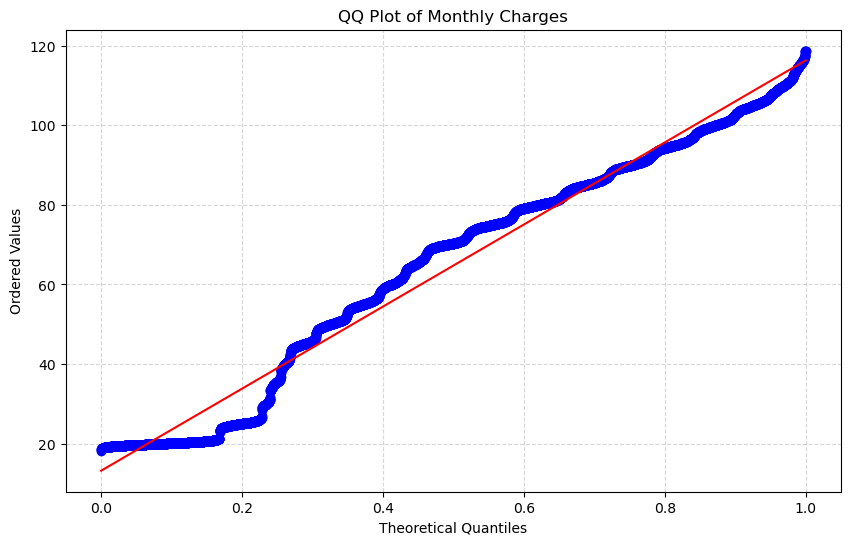

In [ ]:
# QQ plot Uniform Distribution
plt.figure(figsize=(10, 6))
stats.probplot(telco_data['MonthlyCharges'], dist="uniform", plot=plt)
plt.title('QQ Plot of Monthly Charges')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.show()

# Modelling - Logistic regression and Random forest classifier

Confusion Matrix:
[[927 109]
 [182 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



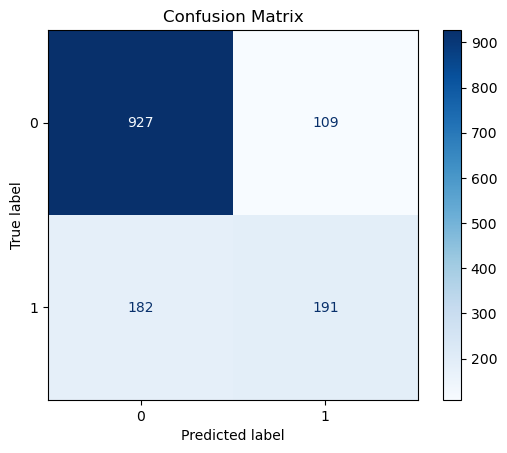

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Selecting relevant features and target variable
X = telco_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService']]
y = telco_data['Churn']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# After fitting logistic regression model
coefficients = model.coef_[0]
intercept = model.intercept_

print("Intercept:", intercept)
print("Feature Coefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Intercept: [-4.22668861]
Feature Coefficients:
tenure: -1.451247897720036
MonthlyCharges: 0.6963104650649682
TotalCharges_100.2: -0.04890702927848663
TotalCharges_100.25: 0.07068303589048636
TotalCharges_100.35: -0.00990606047566511
TotalCharges_100.4: 0.0
TotalCharges_100.8: 0.0
TotalCharges_100.9: -0.029887750305038503
TotalCharges_1001.2: -0.09588375545124075
TotalCharges_1001.5: 0.0
TotalCharges_1003.05: 0.0
TotalCharges_1004.35: -0.0026603378559412593
TotalCharges_1004.5: -0.0032821482268964694
TotalCharges_1004.75: -0.0367802650889256
TotalCharges_1005.7: -0.0011242733121275305
TotalCharges_1006.9: -0.0025442312130293555
TotalCharges_1007.8: -0.002798129993687278
TotalCharges_1007.9: -0.00255960880069973
TotalCharges_1008.55: 0.0
TotalCharges_1008.7: 0.08384904718259564
TotalCharges_1009.25: -0.036655937473255185
TotalCharges_101.1: -0.052799764704573635
TotalCharges_101.45: 0.07037317526671133
TotalCharges_101.65: -0.05817100146809373
TotalCharges_101.9: -0.0321999192491969
Tota

# Interpretation of Logistic Regression results:

## Precision:
Precision for class 0 (Not Churn): 84%
Precision for class 1 (Churn): 64%

Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this context, it means that when the model predicts a customer will churn, it is correct about 64% of the time.

## Recall (Sensitivity):

Recall for class 0 (Not Churn): 89%
Recall for class 1 (Churn): 51%

Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. In this context, it means that the model identifies about 51% of the actual churn cases.

## F1-Score:

F1-score for class 0 (Not Churn): 0.86
F1-score for class 1 (Churn): 0.57

The F1-score is the weighted average of precision and recall. It balances precision and recall, providing a single metric to evaluate the model's performance.

## Accuracy:

Overall accuracy of the model is 79%. While accuracy is an important metric, it might not be the only one to consider, especially in imbalanced datasets.

## Customer Types More Likely to Churn: Precision and Recall for Churn (Class 1):

The model has a moderate precision for predicting churn (64%), meaning that when it predicts a customer will churn, it is correct about 64% of the time.

The recall for predicting churn is relatively low (51%), indicating that the model misses a significant portion of actual churn cases.

## F1-Score for Churn (Class 1):

The F1-score for predicting churn is 0.57, reflecting a trade-off between precision and recall.

In summary, the model performs reasonably well in identifying customers who are likely to churn but may benefit from improvements in recall. Further tuning or exploring different models might be considered to enhance predictive performance.

Cross-Validation Accuracy: 0.7859413933153769
Confusion Matrix:
[[967  69]
 [212 161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



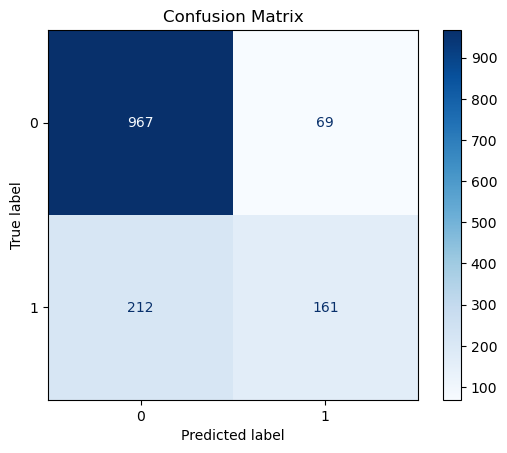

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model Selection (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=40)  # Adjust hyperparameters
model.fit(X_train, y_train)

# Cross-Validation
cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_accuracy.mean()}')

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# After fitting RandomForestClassifier model
feature_importance = model.feature_importances_  # For RandomForestClassifier
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
tenure: 0.11777785859533134
MonthlyCharges: 0.08499760134966394
TotalCharges_100.2: 8.994421725595675e-05
TotalCharges_100.25: 0.00011511448574925714
TotalCharges_100.35: 5.078067590961305e-07
TotalCharges_100.4: 0.0
TotalCharges_100.8: 0.0
TotalCharges_100.9: 1.1810715824302543e-05
TotalCharges_1001.2: 0.0002545088674947111
TotalCharges_1001.5: 0.0
TotalCharges_1003.05: 0.0
TotalCharges_1004.35: 1.0479361963662851e-07
TotalCharges_1004.5: 4.741070553115273e-07
TotalCharges_1004.75: 2.7382606633699264e-05
TotalCharges_1005.7: 2.585289114207121e-06
TotalCharges_1006.9: 6.343836620210022e-07
TotalCharges_1007.8: 1.2086523802042728e-06
TotalCharges_1007.9: 4.355979337399195e-07
TotalCharges_1008.55: 0.0
TotalCharges_1008.7: 0.00014748277504397192
TotalCharges_1009.25: 1.9598526305312975e-05
TotalCharges_101.1: 0.00014910975256903516
TotalCharges_101.45: 6.863526067708193e-05
TotalCharges_101.65: 0.00010539078732428893
TotalCharges_101.9: 4.109882941728496e-05
TotalChar

# Interpretation:

## Precision:

Precision for class 0 (Not Churn): 82%
Precision for class 1 (Churn): 70%

## Recall (Sensitivity):

Recall for class 0 (Not Churn): 93%
Recall for class 1 (Churn): 43%

## F1-Score:

F1-score for class 0 (Not Churn): 0.87
F1-score for class 1 (Churn): 0.53

## Accuracy:

Overall accuracy of the model is 80%.

## Customer Types More Likely to Churn:

## Precision and Recall for Churn (Class 1):

The Random Forest Classifier has a higher recall for predicting churn (43%) compared to the logistic regression model.

The precision for predicting churn is also improved (70%).

## F1-Score for Churn (Class 1):

The F1-score for predicting churn is 0.53, indicating a balance between precision and recall.

# Comparison with Logistic Regression:
The Random Forest Classifier shows improvement in both precision and recall for predicting churn compared to the logistic regression model. However, there is still room for improvement, especially in increasing recall to capture more true churn cases.

In summary, the Random Forest Classifier demonstrates better performance in identifying customers likely to churn compared to the logistic regression model, but further tuning or exploring different models may enhance predictive accuracy. The choice of the appropriate model depends on the specific requirements and trade-offs in precision and recall.